# **Unsupervised Learning — Principal Component Analysis (PCA)**

Principal component analysis is a method that rotates the dataset so that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features based on their importance in explaining the data.
PCA reduces the number of independent variables in a dataset and is particularly applicable when the ratio of data points to independent variables is low. PCA transforms a linear combination of variables such that the resulting variable expresses the maximum variance within the combination of variables.

PCA is mostly used as a tool in exploratory data analysis and for making predictive models. 

=>Highly correlated features — means High Bias — Remove 1 variable out of that.

=>PCA removes inconsistencies, redundant data and highly correlated features.

=> Non-Parametric and solves overfitting — occur by high -dimesionality. Filter noisy dataset eg. — image compression.

--------    PCA steps: ------------

 1.  Standardization of data
 2.  Computing Covariance matrix
 3.  Calculating EigenVectore and EigenValues
 4.  Computing Principal Components
 5.   Reducing the dimension of data by selecting best components without information loss.

 # Important Libaries

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
import math  
from matplotlib.colors import ListedColormap

In [26]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")

print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

 # Overview of dataset

In [27]:
df.size

900

In [28]:
df.shape

(150, 6)

In [29]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [30]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [32]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [35]:
df.sample(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
23,24,5.1,3.3,1.7,0.5,Iris-setosa
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
35,36,5.0,3.2,1.2,0.2,Iris-setosa
108,109,6.7,2.5,5.8,1.8,Iris-virginica
37,38,4.9,3.1,1.5,0.1,Iris-setosa


In [36]:
df.nunique() 

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [37]:
df.isnull().sum() 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [38]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [40]:
df['Species'] = df['Species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})


In [41]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# EDA Plots

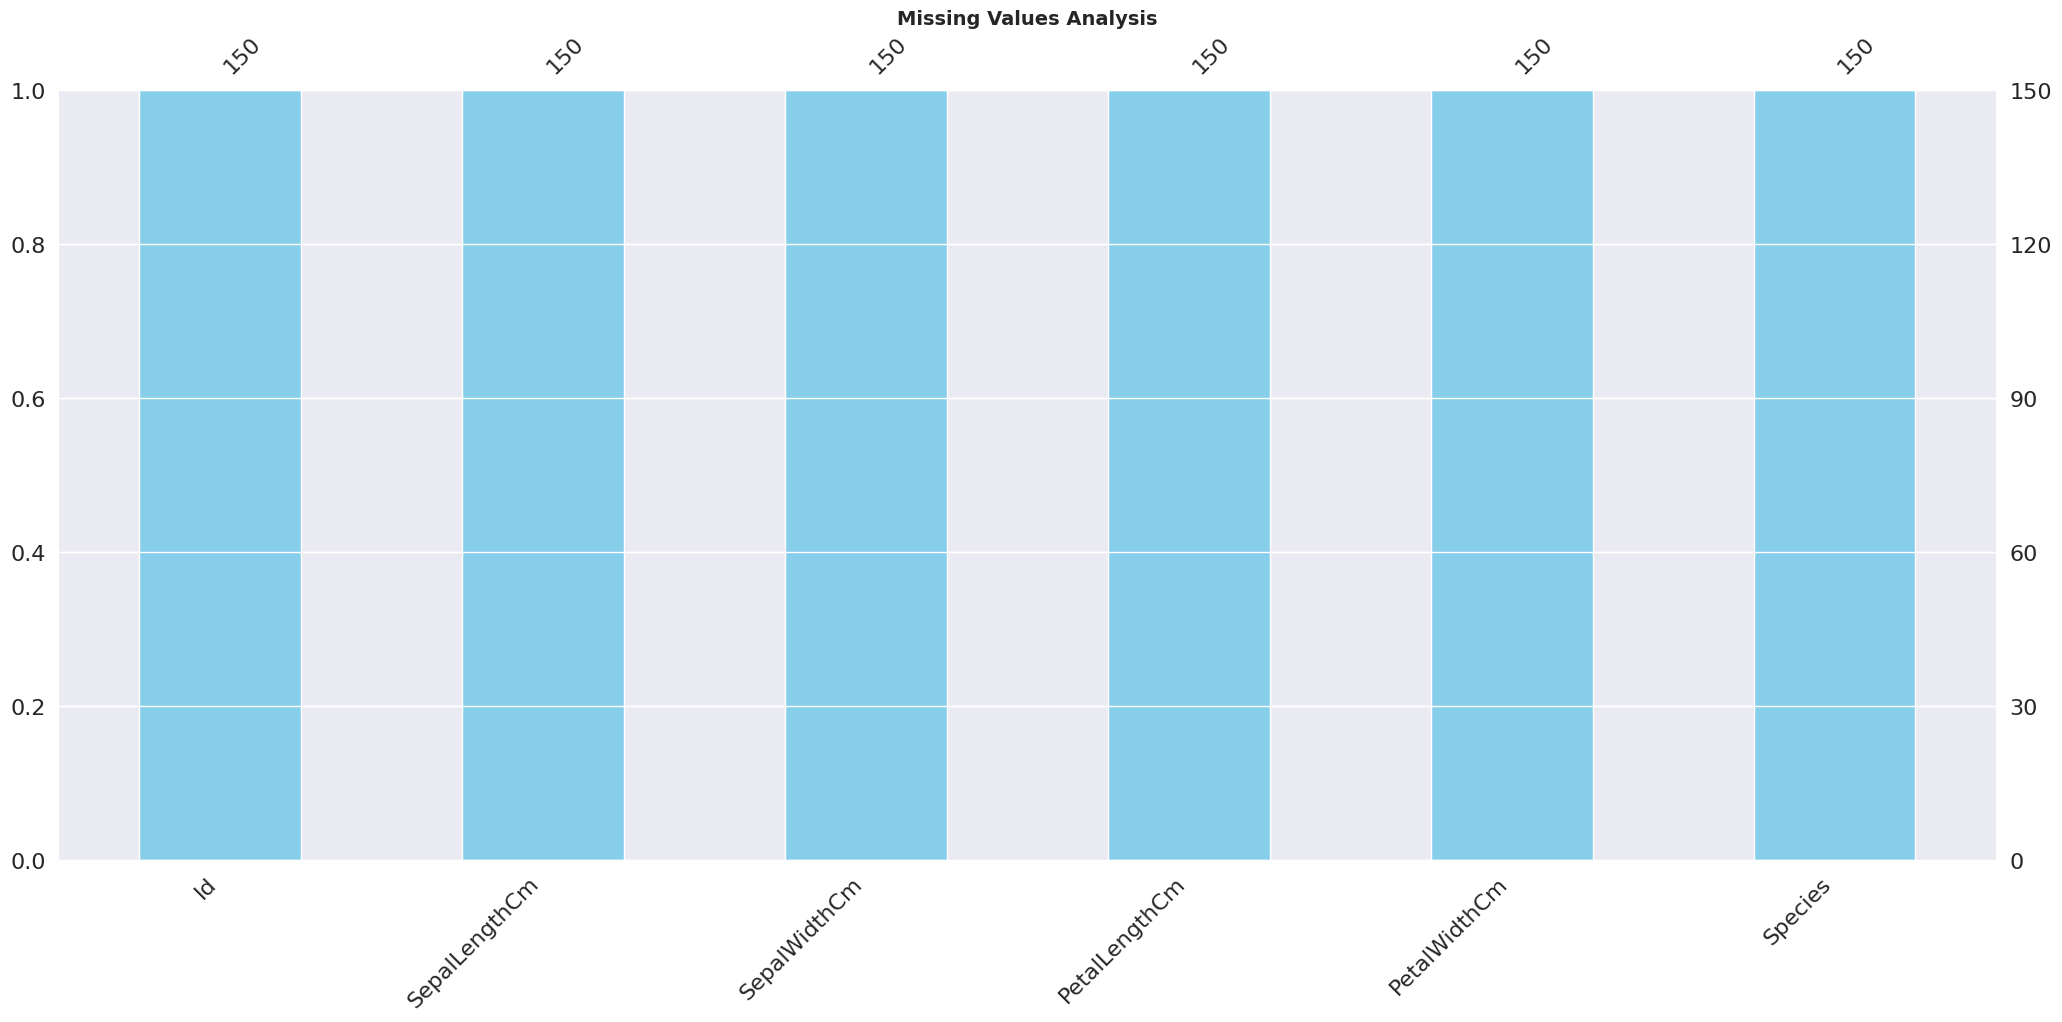

In [42]:
import missingno as msno


# Set figure size for better visibility
plt.figure(figsize=(10, 5))

# Create the missing values bar plot
msno.bar(df, color='skyblue')

# Add a title for better readability
plt.title("Missing Values Analysis", fontsize=14, fontweight='bold')

# Show the plot
plt.show()


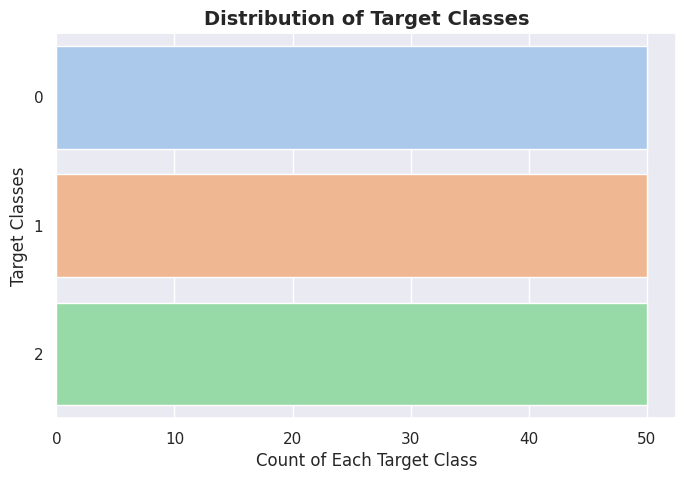

In [43]:


# Set figure size for better visibility
plt.figure(figsize=(8, 5))

# Count plot for target classes
sns.countplot(y=df['Species'], data=df, palette='pastel')

# Labels and title for better understanding
plt.xlabel("Count of Each Target Class", fontsize=12)
plt.ylabel("Target Classes", fontsize=12)
plt.title("Distribution of Target Classes", fontsize=14, fontweight='bold')

# Show the plot
plt.show()


# Early Insights 
1. 150 rows
2. 4 Independent variables to act as factors
3. All have the same units of measurement (cm)
4. No missing data
5. Three unique target classes namely : 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'
6. No class imbalance, all target classes have equal number of rows (50 each).

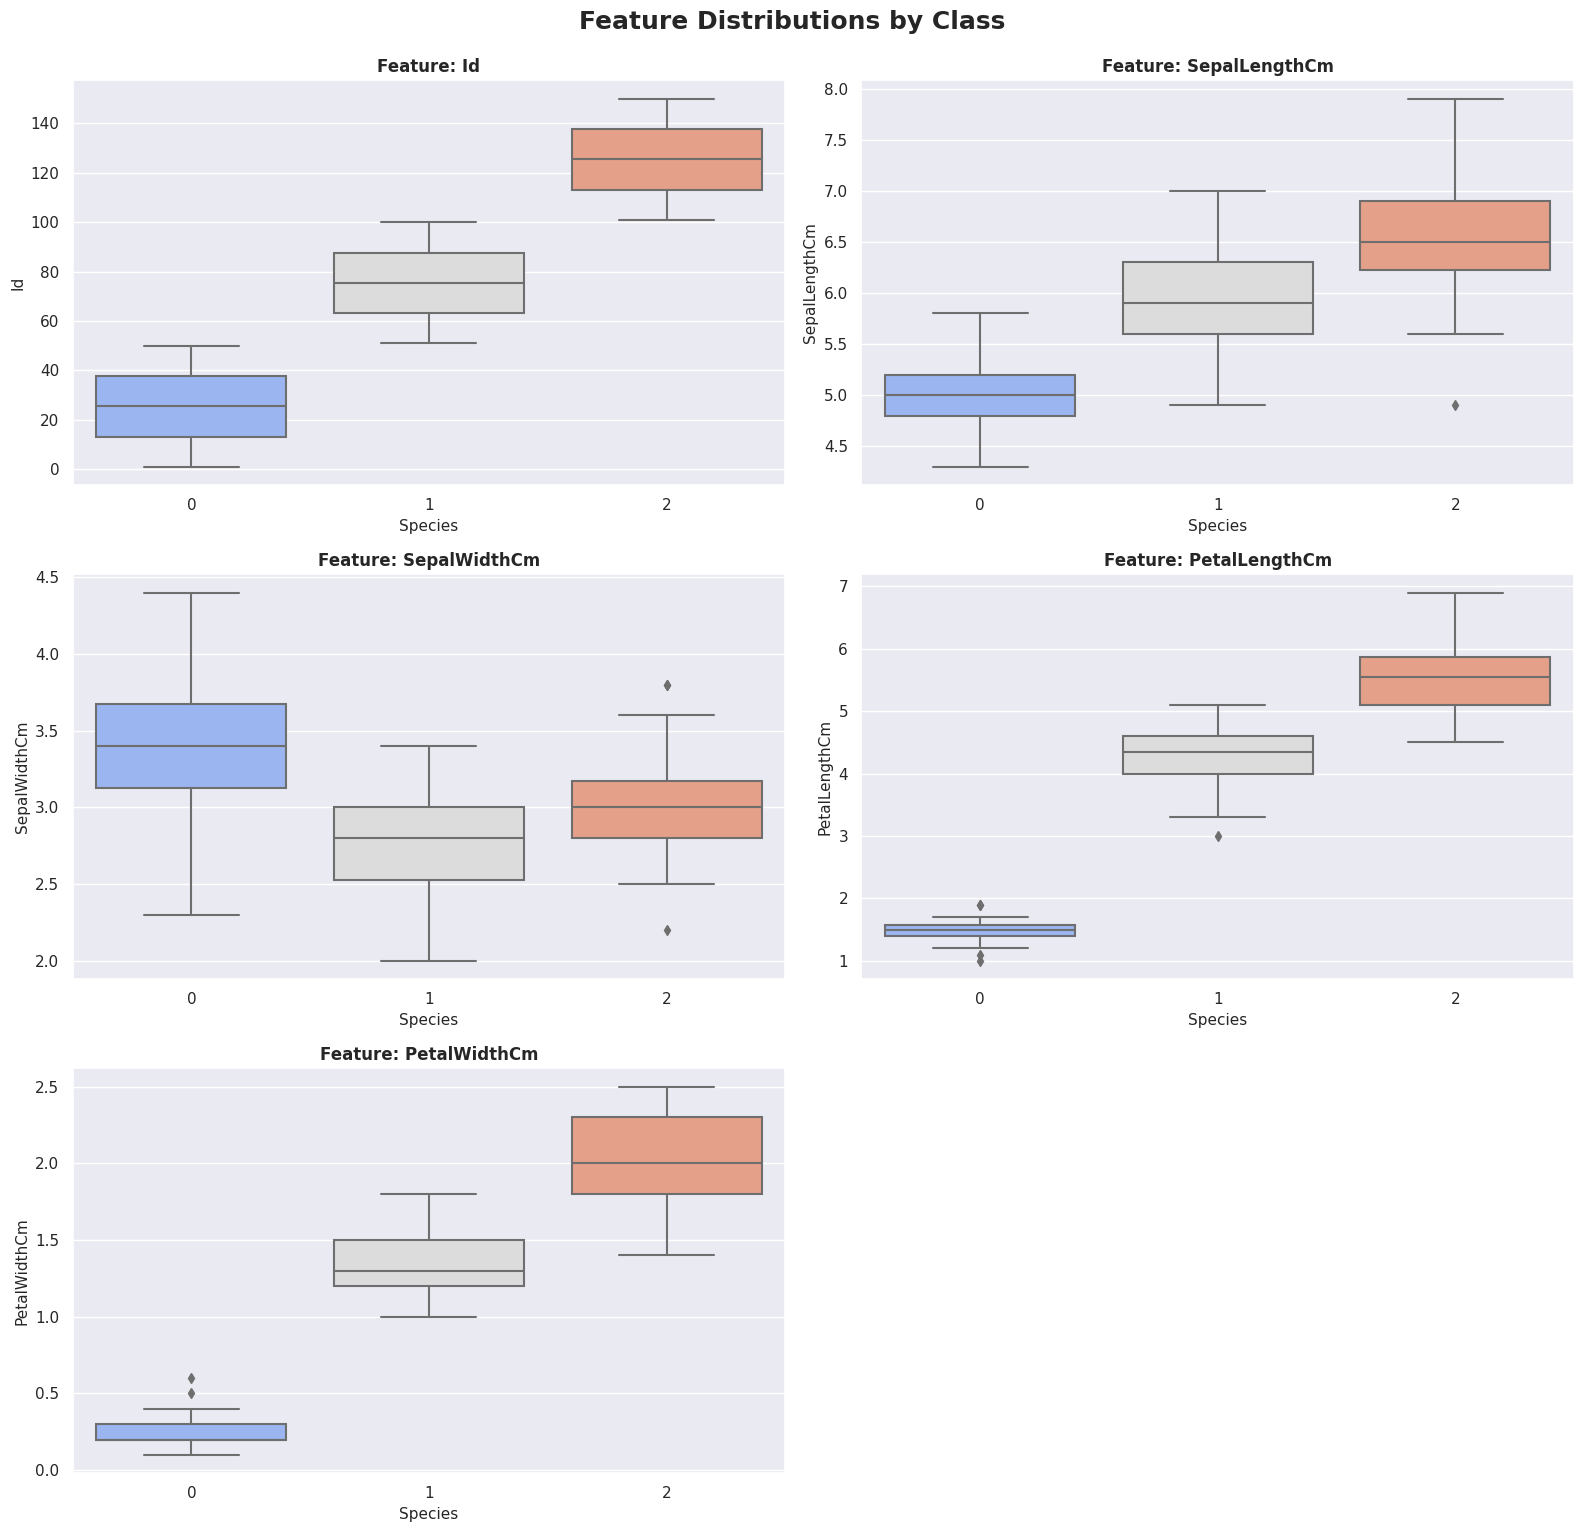

In [44]:


# Define the number of features (excluding 'Species')
features = df.columns[:-1]  # Exclude the last column (target)
num_features = len(features)  

# Dynamically calculate the grid size
num_cols = 2  # Keep it consistent for readability
num_rows = math.ceil(num_features / num_cols)  

# Create subplots dynamically
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, num_rows * 5))
axes = axes.flatten()  # Flatten to avoid indexing issues

# Generate box plots for each feature
for i, feature in enumerate(features):
    sns.boxplot(x=df['Species'], y=df[feature], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Feature: {feature}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel("Species", fontsize=11)
    axes[i].set_ylabel(feature, fontsize=11)

# Remove any empty subplots (if num_features < num_rows * num_cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Improve layout and add a global title
plt.tight_layout()
plt.suptitle("Feature Distributions by Class", fontsize=18, fontweight="bold", y=1.02)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na

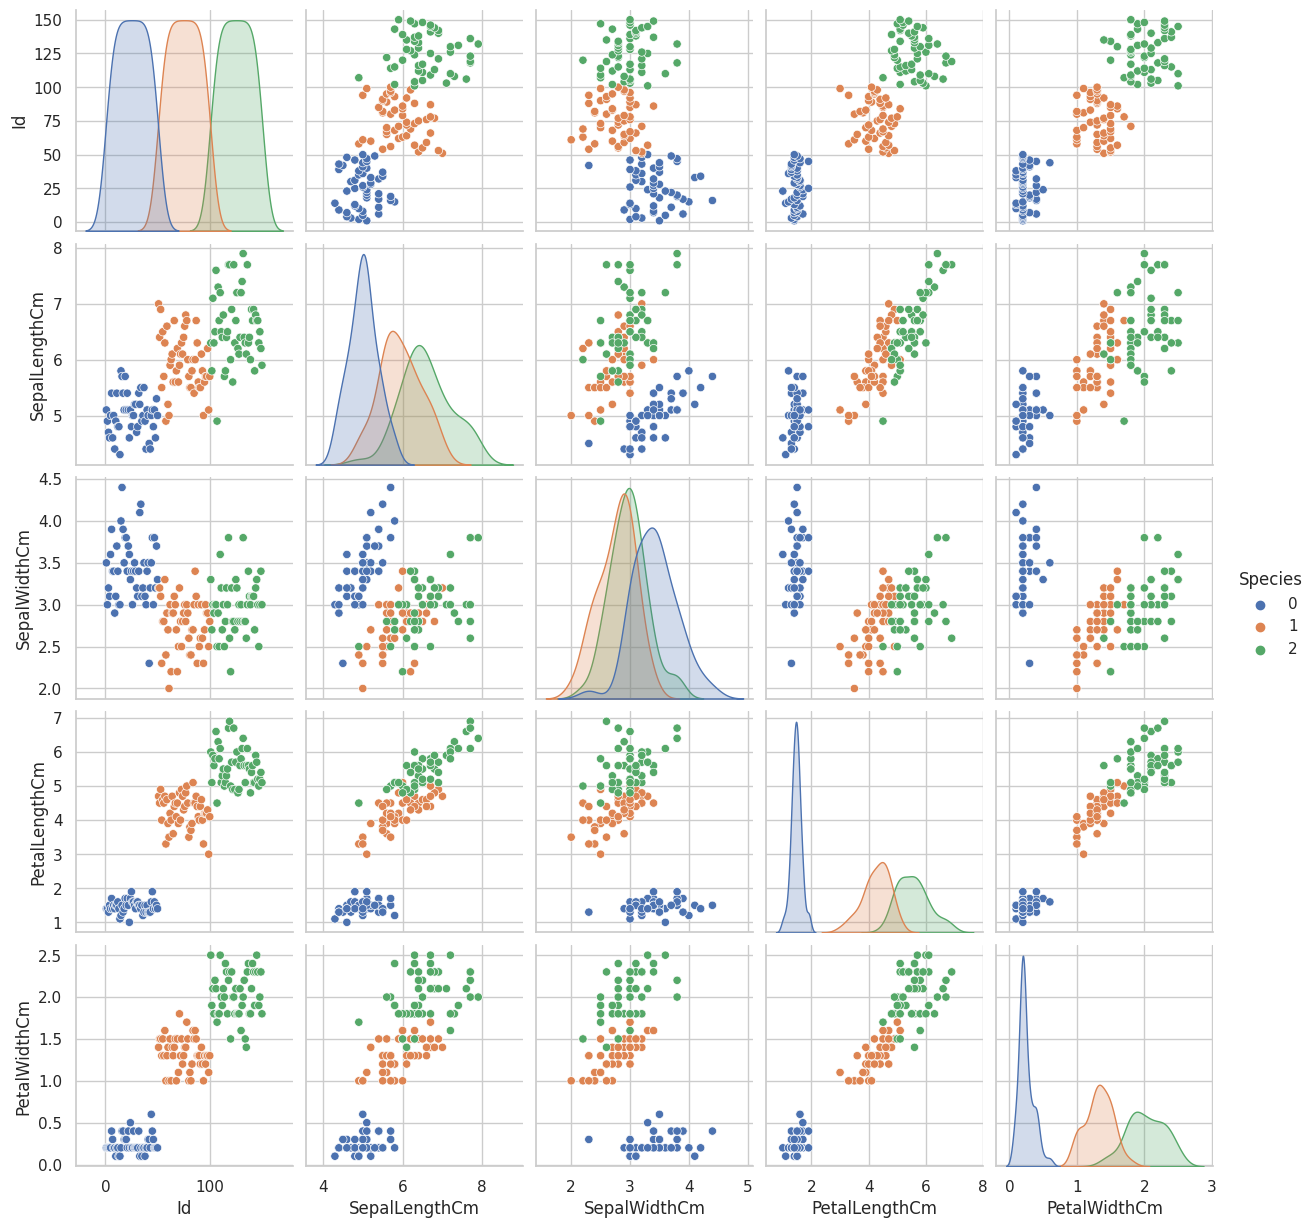

In [47]:
p=sns.pairplot(df, hue = 'Species')

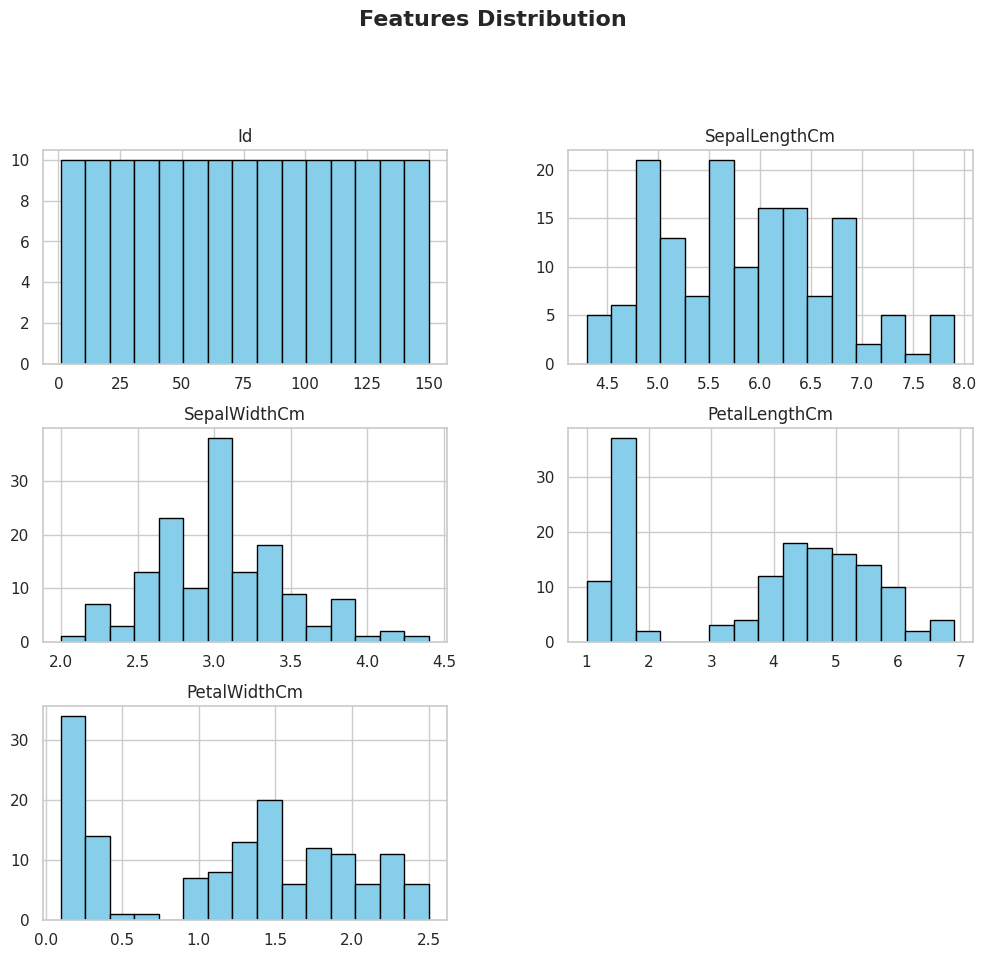

In [48]:
# Create histograms with better aesthetics
df.hist(figsize=(12, 10), bins=15, color="skyblue", edgecolor="black", grid=True)

# Add a global title
plt.suptitle("Features Distribution", fontsize=16, fontweight="bold", y=1.02)

# Show the plot
plt.show()

# Without PCA

In [49]:
X = df.drop(['Species'],axis=1)
y = df.Species

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

In [52]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 1.0 %
Test score before PCA 1.0 %


# With PCA

In [53]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [54]:
pca.get_covariance()

array([[ 0.08501869,  0.04806653, -0.02095157,  0.07697393,  0.08342342],
       [ 0.04806653,  0.05290845, -0.00454496,  0.05996621,  0.05982683],
       [-0.02095157, -0.00454496,  0.03263959, -0.02271983, -0.02048285],
       [ 0.07697393,  0.05996621, -0.02271983,  0.08943348,  0.09155279],
       [ 0.08342342,  0.05982683, -0.02048285,  0.09155279,  0.1011136 ]])

In [55]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84094005, 0.09198147, 0.04225984, 0.01996366, 0.00485498])

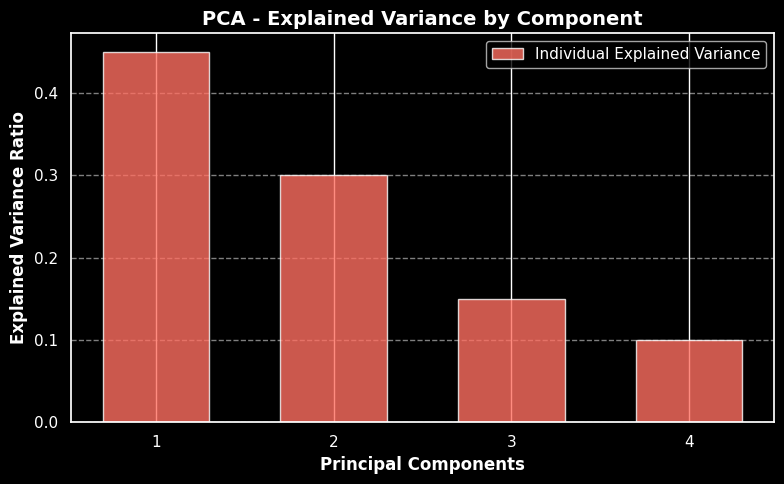

In [66]:
# Sample explained variance array (Replace with your actual PCA results)
explained_variance = np.array([0.45, 0.30, 0.15, 0.10])

# Use dark background for better contrast
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 5))

    # Bar plot with new color scheme
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, 
            alpha=0.8, color="#FF6F61", edgecolor="white", width=0.6, 
            label='Individual Explained Variance')  # Changed to warm red-orange

    # Labels and aesthetics
    plt.ylabel('Explained Variance Ratio', fontsize=12, fontweight='bold', color="white")
    plt.xlabel('Principal Components', fontsize=12, fontweight='bold', color="white")
    plt.title("PCA - Explained Variance by Component", fontsize=14, fontweight='bold', color="white")
    
    # Customize ticks and grids
    plt.xticks(range(1, len(explained_variance) + 1), fontsize=11, color="white")
    plt.yticks(fontsize=11, color="white")
    plt.grid(axis='y', linestyle='--', alpha=0.5, color='white')
    
    # Show the legend
    plt.legend(loc='best', fontsize=11)

    # Tight layout for better fitting
    plt.tight_layout()
    plt.show()


In [57]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [58]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [59]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9904761904761905 %
Test score after PCA 1.0 %


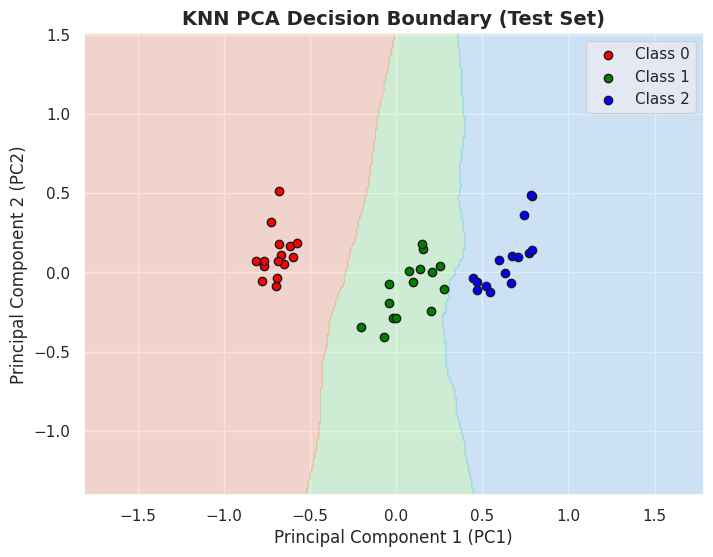

In [65]:

# Define variables
classifier = knn_pca  # Make sure knn_pca is properly trained
X_set, y_set = X_test_new, y_test  

# Create a meshgrid for decision boundary
X1, X2 = np.meshgrid(
    np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, step=0.01),
    np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, step=0.01)
)

# Add the third component (e.g., np.zeros or actual 3rd component values)
# Assuming the third component should be 0 for visualization
Z = classifier.predict(np.c_[X1.ravel(), X2.ravel(), np.zeros(X1.ravel().shape[0])]).reshape(X1.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, alpha=0.3, cmap=ListedColormap(["#FFA07A", "#90EE90", "#87CEFA"]))

# Scatter plot for test set
colors = ["red", "green", "blue"]
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c=colors[i], label=f"Class {j}", edgecolors="k")

# Labels and aesthetics
plt.title("KNN PCA Decision Boundary (Test Set)", fontsize=14, fontweight="bold")
plt.xlabel("Principal Component 1 (PC1)", fontsize=12)
plt.ylabel("Principal Component 2 (PC2)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()